<a href="https://colab.research.google.com/github/Cristian2820/Senales-y-sistemas/blob/main/Parciales/Parcial%201%20/Parcial%201S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1 (valor 2.5 puntos)

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.

En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.

-----------------------------------

Este código genera y grafica una señal cuasiperiódica compuesta por varias componentes sinusoidales con diferentes frecuencias y amplitudes. Primero, se definen los períodos individuales de las señales $(T1, T2, T3)$ y, a partir de ellos, se calculan sus respectivas frecuencias $(F1, F2, F3)$. Se establece una frecuencia de muestreo $Fs$ de 5000 Hz, que determina el período de muestreo $Ts$ y asegura una discretización adecuada de la señal. A continuación, se crea un vector de tiempo $t$ que abarca tres períodos de la señal cuasiperiódica, con un paso igual a $Ts$. La señal $x(t)$ se construye como una combinación lineal de varias componentes sinusoidales: una suma de términos de frecuencia 500 Hz con amplitud 0.2121, una componente de 1000 Hz con amplitud 0.6, y otra de 5500 Hz con amplitud -1. Estas frecuencias no tienen una relación armónica exacta, lo que da lugar a una señal cuasiperiódica. Finalmente, la señal se grafica en función del tiempo mediante matplotlib.





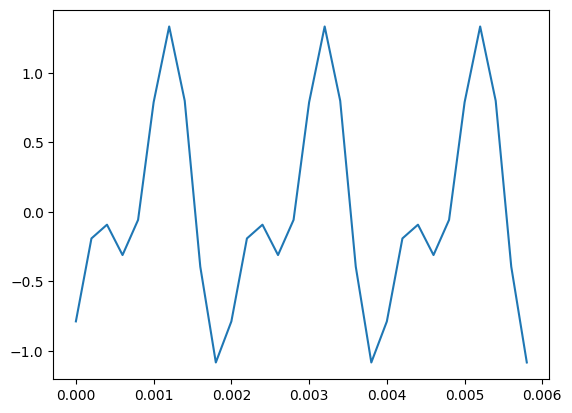

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Definir parámetros de la simulación

#Periodos de la señal
T1 = 1/500
T2 = 1/1000
T3 = 1/5500
#Periodo señal cuasiperiodica
T = 1/500
#Frecuencias
F1 = 1/T1
F2 = 1/T2
F3 = 1/T3
#Fs: frecuencia muestreo
Fs = 5000
Ts = 1/Fs #periodo muestreo

t = np.arange(0,3*T,Ts) #vector de tiempo que incluye tres periodos cuasiperiódica
x = 0.2121*np.cos(1000*np.pi*t) - 0.2121*np.sin(1000*np.pi*t) + 0.6*np.sin(2000*np.pi*t)-np.cos(11000*np.pi*t)

plt.plot(t,x)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

La función my_ceropen genera una línea recta basada en un arreglo de valores $x$ y límites $y_{\text{min}}$ y $y_{\text{max}}$, con valores predeterminados de -3.3 y 3.3, respectivamente. El cálculo se realiza identificando los valores extremos de $x$ $x_{\text{min}}$ y $x_{\text{max}}$ y determinando la pendiente $m$ con la fórmula $m = \frac{y_{\text{max}} - y_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$. La intersección $c$ se calcula como $c = y_{\text{min}} - m \cdot x_{\text{min}}$. Usando la ecuación de la recta $y = m \cdot x + c$, se generan los valores correspondientes de $y$, que son retornados como un arreglo. Esta función es útil para escalar datos o simular procesos de cero y pendiente de manera sencilla y flexible.


In [ ]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

El código llama a la función my_ceropen para generar un conjunto de valores $y$ que representan una línea recta ajustada a los valores del arreglo $x$, escalada entre los límites especificados para el eje $y$, que son $-3.3$ como mínimo y $3.3$ como máximo. En este proceso, se calcula la pendiente y la intersección de la recta de manera que los valores generados en $y$ correspondan proporcionalmente a los valores de entrada en $x$, dentro del rango definido. El resultado es un arreglo $y$ listo para ser utilizado o visualizado.


In [ ]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

La función my_cuantizador realiza una cuantización punto a punto de un valor de entrada $y_n$ en relación con un vector de estados $vq$. Primero, calcula la distancia entre el valor $y_n$ y cada uno de los niveles de cuantización en $vq$ utilizando la función cdist de la biblioteca scipy.spatial.distance. La distancia se calcula al convertir tanto $y_n$ como $vq$ en vectores columna. Luego, se encuentra el índice del nivel de cuantización más cercano a $y_n$ utilizando np.argmin, que devuelve la posición de la distancia mínima. Finalmente, la función retorna el valor de $vq$ correspondiente al índice encontrado, es decir, el nivel de cuantización más cercano a $y_n$. Este proceso es utilizado para discretizar o reducir la resolución de señales y datos, asignando el valor $y_n$ al nivel más cercano de cuantización en $vq$.


In [ ]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Este fragmento de código realiza la cuantización de una señal utilizando un vector de cuantización basado en un número de bits determinado. Primero, se define el número de bits nbits, los límites mínimo y máximo rmin y rmax del rango de cuantización, y se crea un vector ve que contiene los niveles de cuantización distribuidos uniformemente entre rmin y rmax, utilizando la función np.linspace. Luego, el código recorre el vector y (que contiene los valores a cuantizar) y, para cada valor, se utiliza la función my_cuantizador para encontrar el nivel de cuantización más cercano en ve. Si es la primera muestra, el valor cuantizado se guarda en el arreglo yq, y si es una muestra posterior, el valor se apila al arreglo yq utilizando np.append. Al final, yq contiene los valores cuantizados de la señal original y según los niveles de cuantización definidos en ve.


In [ ]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

Finalmente este código grafica una señal continua y su versión cuantizada junto con los niveles de cuantización. Primero, utiliza plt.plot(t, y, c='r', label='ycs') para graficar la señal continua $y$ en rojo. Luego, se usa plt.stem(t, y, label='ycs_dis') para graficar la señal discreta $y$ como un gráfico de tallos, representando los valores discretos de la señal. A continuación, se grafican los niveles de cuantización en el mismo gráfico, usando un bucle for para trazar líneas horizontales correspondientes a cada nivel de cuantización en ve. Finalmente, la señal digital cuantizada se grafica con plt.plot(t, yq, c='y', marker='o', label='ydig', linewidth=2), donde la señal cuantizada yq se muestra en amarillo con marcadores circulares. Se añade una leyenda, se activa la cuadrícula para mayor claridad y se etiquetan los ejes t y Amplitud. El gráfico resultante muestra la señal continua, la señal discreta, los niveles de cuantización y la señal digital cuantizada.


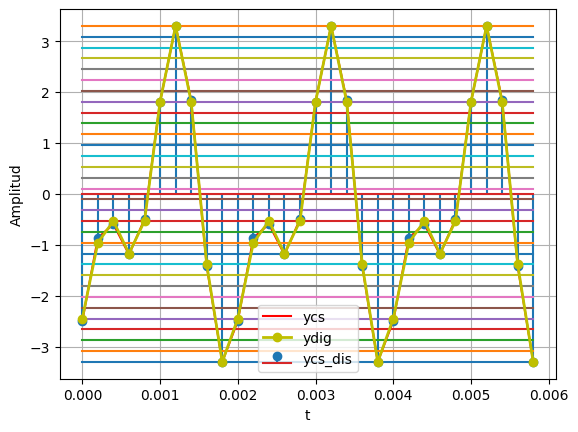

In [ ]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

---------------------------------

El código genera y grafica una señal cuasiperiódica, asegurando que se cumpla el **criterio de Nyquist** para evitar aliasing durante el muestreo. Primero, el usuario introduce la frecuencia de muestreo $Fs$ como un valor entero. Luego, se calculan los periodos $( T1, T2, T3 )$ y sus frecuencias correspondientes $( F1, F2, F3 )$. El código verifica si $Fs$ cumple con el criterio de Nyquist $(Fs \geq 2 \cdot \text{mayor frecuencia})$; si no se cumple, ajusta $Fs$ al doble de la mayor frecuencia para garantizar un muestreo correcto. A continuación, se genera un vector de tiempo $t$, que abarca tres periodos de la señal cuasiperiódica con un intervalo determinado por $Ts = 1/Fs$. La señal $x(t)$ se define como una combinación de componentes sinusoidales y cosenoidales con frecuencias específicas. Finalmente, utilizando matplotlib, se grafica la señal muestreada $x(t)$ en función del tiempo, añadiendo etiquetas a los ejes, una cuadrícula y una leyenda para facilitar su interpretación. El resultado es un gráfico que muestra la señal cuasiperiódica muestreada, cumpliendo las condiciones necesarias para evitar distorsiones por aliasing.


Introduce la frecuencia de muestreo (Fs): 12000
Se cumple el criterio de Nyquist.


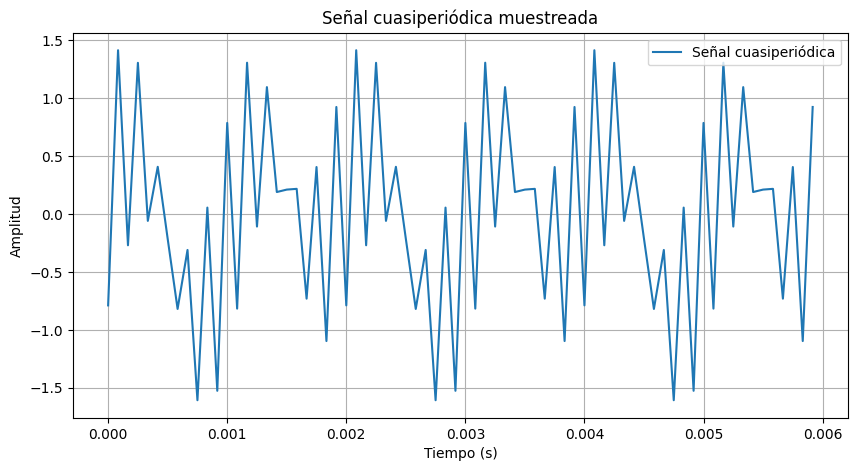

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Solicitar la frecuencia de muestreo como un valor entero
A = int(input("Introduce la frecuencia de muestreo (Fs): "))

# Definir periodos de las señales
T1 = 1 / 500
T2 = 1 / 1000
T3 = 1 / 5500

# Período de la señal cuasiperiódica
T = 1 / 500

# Calcular frecuencias
F1 = 1 / T1
F2 = 1 / T2
F3 = 1 / T3

# Establecer Fs inicial
Fs = A
Ts = 1 / Fs  # Periodo de muestreo

# Determinar la mayor frecuencia
mayor_F = max(F1, F2, F3)

# Verificar el criterio de Nyquist
if Fs >= 2 * mayor_F:
    print("Se cumple el criterio de Nyquist.")
else:
    Fs = 2 * mayor_F  # Ajustar Fs al doble de la mayor frecuencia
    print(f"No se cumple el criterio de Nyquist. Cambia la frecuencia de muestreo a al menos {Fs:.2f} Hz.")

# Crear el vector de tiempo para tres periodos de la señal cuasiperiódica
t = np.arange(0, 3 * T, Ts)

# Definir la señal cuasiperiódica
x = (
    0.2121 * np.cos(1000 * np.pi * t)
    - 0.2121 * np.sin(1000 * np.pi * t)
    + 0.6 * np.sin(2000 * np.pi * t)
    - np.cos(11000 * np.pi * t)
)

# Graficar la señal
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Señal cuasiperiódica')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal cuasiperiódica muestreada')
plt.grid(True)
plt.legend()
plt.show()

La función my_ceropen genera una línea recta basada en un arreglo de valores $x$ y límites $y_{\text{min}}$ y $y_{\text{max}}$, con valores predeterminados de -3.3 y 3.3, respectivamente. El cálculo se realiza identificando los valores extremos de $x$ $x_{\text{min}}$ y $x_{\text{max}}$ y determinando la pendiente $m$ con la fórmula $m = \frac{y_{\text{max}} - y_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$. La intersección $c$ se calcula como $c = y_{\text{min}} - m \cdot x_{\text{min}}$. Usando la ecuación de la recta $y = m \cdot x + c$, se generan los valores correspondientes de $y$, que son retornados como un arreglo. Esta función es útil para escalar datos o simular procesos de cero y pendiente de manera sencilla y flexible.

In [ ]:
#cero y pendiente
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

El código llama a la función my_ceropen para generar un conjunto de valores $y$ que representan una línea recta ajustada a los valores del arreglo $x$, escalada entre los límites especificados para el eje $y$, que son $-3.3$ como mínimo y $3.3$ como máximo. En este proceso, se calcula la pendiente y la intersección de la recta de manera que los valores generados en $y$ correspondan proporcionalmente a los valores de entrada en $x$, dentro del rango definido. El resultado es un arreglo $y$ listo para ser utilizado o visualizado.

In [ ]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = -3.3, ymax = 3.3)

La función my_cuantizador realiza una cuantización punto a punto de un valor de entrada $y_n$ en relación con un vector de estados $vq$. Primero, calcula la distancia entre el valor $y_n$ y cada uno de los niveles de cuantización en $vq$ utilizando la función cdist de la biblioteca scipy.spatial.distance. La distancia se calcula al convertir tanto $y_n$ como $vq$ en vectores columna. Luego, se encuentra el índice del nivel de cuantización más cercano a $y_n$ utilizando np.argmin, que devuelve la posición de la distancia mínima. Finalmente, la función retorna el valor de $vq$ correspondiente al índice encontrado, es decir, el nivel de cuantización más cercano a $y_n$. Este proceso es utilizado para discretizar o reducir la resolución de señales y datos, asignando el valor $y_n$ al nivel más cercano de cuantización en $vq$.

In [ ]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

Este fragmento de código realiza la cuantización de una señal utilizando un vector de cuantización basado en un número de bits determinado. Primero, se define el número de bits nbits, los límites mínimo y máximo rmin y rmax del rango de cuantización, y se crea un vector ve que contiene los niveles de cuantización distribuidos uniformemente entre rmin y rmax, utilizando la función np.linspace. Luego, el código recorre el vector y (que contiene los valores a cuantizar) y, para cada valor, se utiliza la función my_cuantizador para encontrar el nivel de cuantización más cercano en ve. Si es la primera muestra, el valor cuantizado se guarda en el arreglo yq, y si es una muestra posterior, el valor se apila al arreglo yq utilizando np.append. Al final, yq contiene los valores cuantizados de la señal original y según los niveles de cuantización definidos en ve.

In [ ]:
#número de bits y vector de cuantización
nbits = 5
rmin = -3.3
rmax = 3.3
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

Finalmente este código grafica una señal continua y su versión cuantizada junto con los niveles de cuantización. Primero, utiliza plt.plot(t, y, c='r', label='ycs') para graficar la señal continua $y$ en rojo. Luego, se usa plt.stem(t, y, label='ycs_dis') para graficar la señal discreta $y$ como un gráfico de tallos, representando los valores discretos de la señal. A continuación, se grafican los niveles de cuantización en el mismo gráfico, usando un bucle for para trazar líneas horizontales correspondientes a cada nivel de cuantización en ve. Finalmente, la señal digital cuantizada se grafica con plt.plot(t, yq, c='y', marker='o', label='ydig', linewidth=2), donde la señal cuantizada yq se muestra en amarillo con marcadores circulares. Se añade una leyenda, se activa la cuadrícula para mayor claridad y se etiquetan los ejes t y Amplitud. El gráfico resultante muestra la señal continua, la señal discreta, los niveles de cuantización y la señal digital cuantizada.


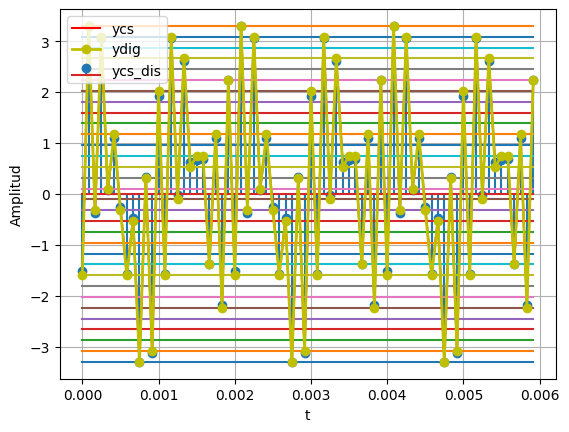

In [ ]:
#graficar señales
plt.plot(t,y,c='r', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

------------------------

El código descarga y descomprime un archivo desde Google Drive utilizando el identificador único del archivo (FILEID). Primero, define el FILEID correspondiente al archivo a descargar. Luego, emplea el comando wget para gestionar la descarga desde Google Drive, manejando automáticamente el sistema de confirmación de descargas mediante cookies temporales. El archivo descargado, llamado P1_model.zip, se descomprime utilizando el comando unzip, con la opción -o para sobrescribir archivos existentes sin requerir confirmación. Finalmente, el comando !dir lista los archivos y directorios presentes en el entorno de trabajo actual, permitiendo verificar el contenido extraído del archivo comprimido. Este proceso es útil para automatizar la gestión de archivos en entornos como Google Colab.


In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-18 04:31:57--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 142.250.125.139, 142.250.125.101, 142.250.125.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-18 04:31:57--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.126.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.126.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    i

El código simula y analiza la respuesta de un sistema definido en el archivo P1_model al aplicar una señal de entrada específica. Primero, se importan las bibliotecas necesarias como numpy, matplotlib, y scipy.signal para la manipulación de señales y visualización. Se instancia el sistema my_system y se inicializa con el método create_, obteniendo la frecuencia de muestreo del sistema. Luego, se define un vector de tiempo t y se genera una señal de entrada signal_u utilizando la función Heaviside, que crea un escalón unitario. Esta señal se pasa a través del sistema para obtener la salida y_u. Finalmente, se visualizan ambas señales (entrada y salida) en gráficos de barras, con etiquetas y leyendas apropiadas, para analizar cómo el sistema responde a la señal de entrada.







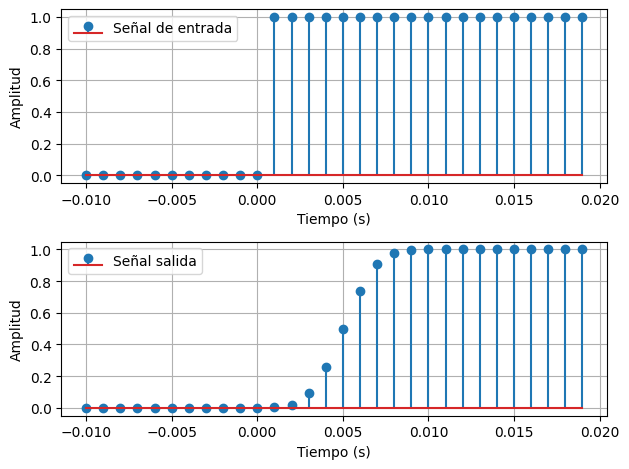

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

En este código se verifica la linealidad del sistema. Primero, se define un factor de escalado a con un valor de 2.5, y se calcula la señal escalada su_esca multiplicando la señal de entrada signal_u por este factor. Luego, se obtiene la salida del sistema y_esca al pasar su_esca a través del sistema con el método predict. Para comparar, se calcula y_esca_2, que es simplemente a multiplicado por la salida original y_u, ya que según la propiedad de linealidad de un sistema, esta relación debería ser equivalente a la salida escalada. Finalmente, se grafican las tres señales (la salida original y_u, la salida con el escalado y_esca, y la salida escalada manualmente y_esca_2) para verificar visualmente si la linealidad se cumple, mostrando que ambas señales escaladas deberían coincidir.


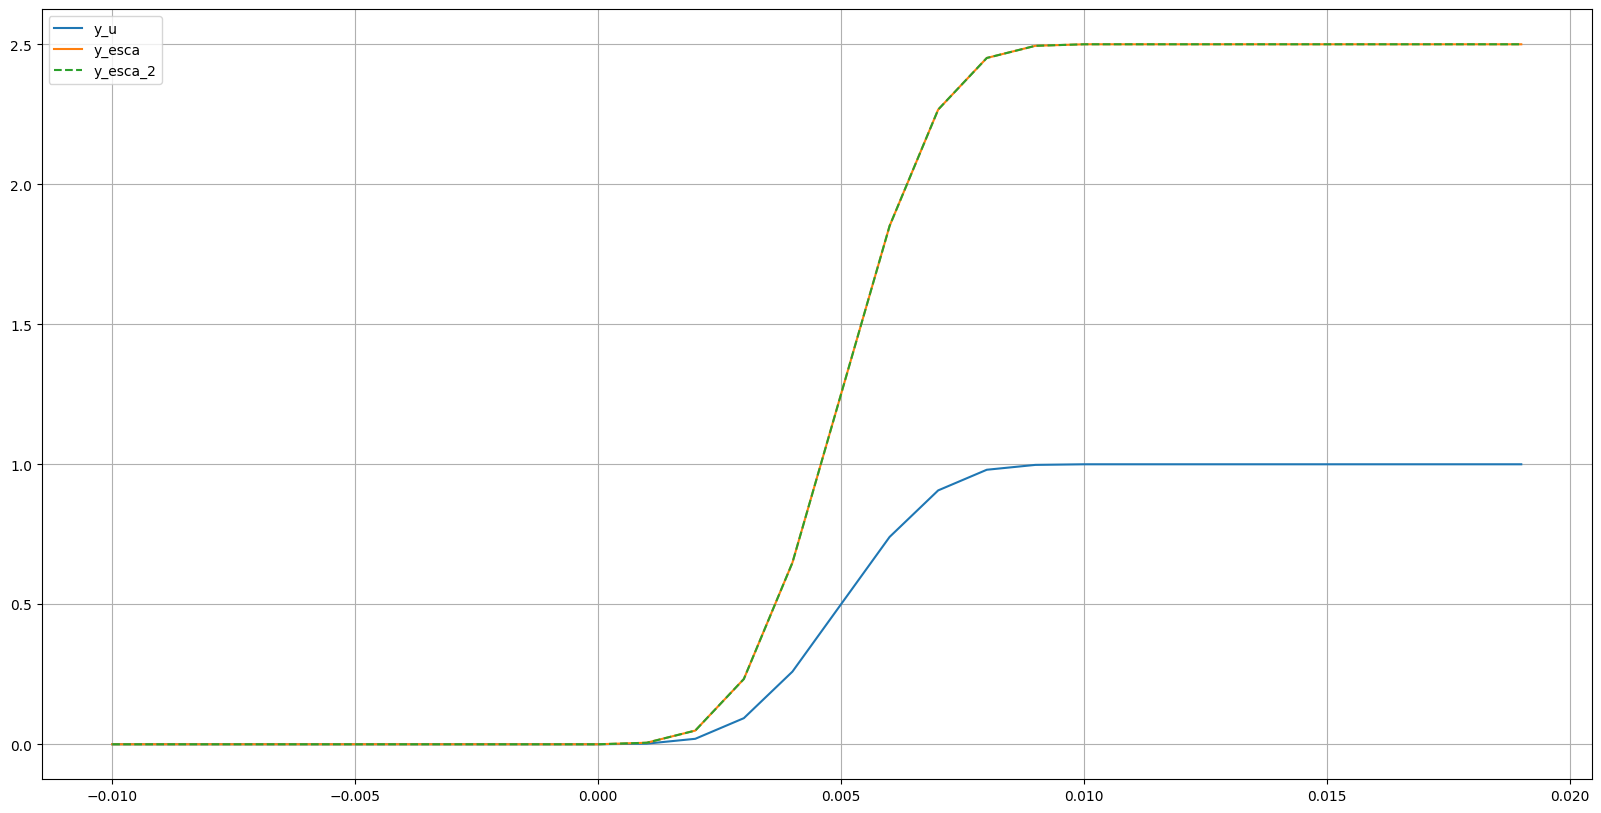

In [ ]:
#Se verifica la linealidad
a = 2.5
su_esca = a*signal_u

y_esca = my_system.predict(su_esca)

y_esca_2 = a*y_u

plt.figure(figsize=(20, 10))
plt.plot(t,y_u,label='y_u')
plt.plot(t,y_esca,label='y_esca')
plt.plot(t,y_esca_2,label='y_esca_2',linestyle="--")
plt.legend()
plt.grid()

Este código simula el comportamiento de un sistema con una señal de entrada, que es una función Heaviside, y visualiza cómo la salida del sistema cambia cuando la señal se desplaza en el tiempo. Primero, se crea una instancia del sistema y se obtiene la frecuencia de muestreo. Luego, se genera la señal de entrada signal_u que es la función Heaviside, la cual toma el valor de 1 cuando el tiempo es mayor o igual a cero y 0 cuando es menor que cero. La salida del sistema para esta señal se calcula mediante el método predict().

Posteriormente, se desplaza la señal de entrada en el tiempo, ajustando el vector de tiempo t para reflejar un desplazamiento de 13 muestras. Se genera así una nueva señal desplazada x_shifted` que se pasa a través del sistema para obtener su salida correspondiente y_u_shifted.

Adicionalmente, se visualizan las señales y sus respectivas salidas utilizando subgráficas (subplots) en una cuadrícula 2x2. La primera subgráfica muestra la señal original, la segunda muestra la salida para la señal original, la tercera muestra la señal desplazada, y la cuarta muestra la salida para la señal desplazada. Cada gráfico se presenta con barras utilizando la función stem, que es útil para mostrar señales discretas. El ajuste de márgenes con plt.tight_layout() asegura que las subgráficas no se sobrepongan, y la figura final se visualiza con plt.show().


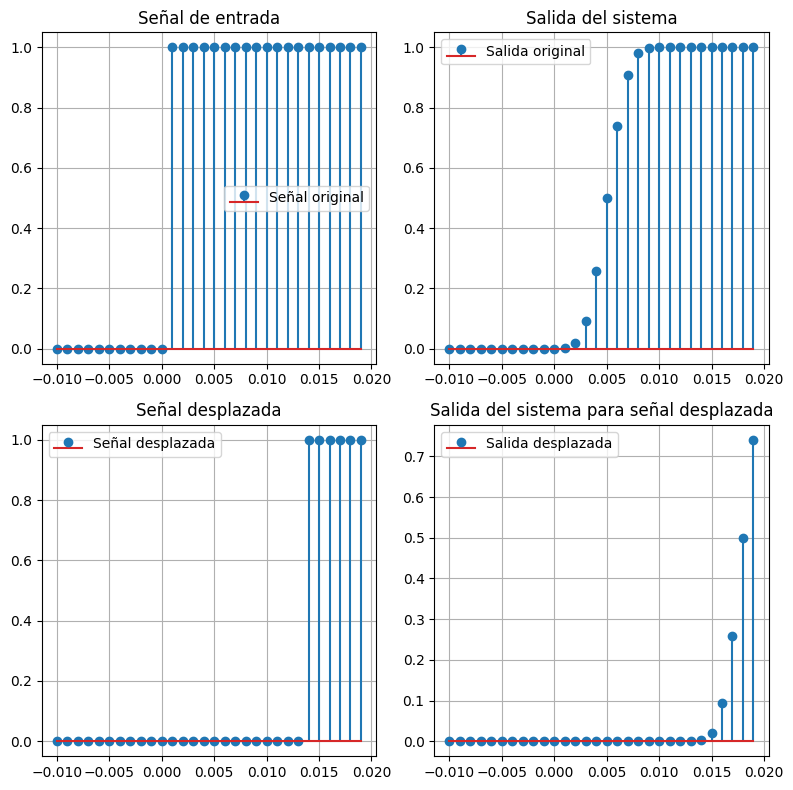

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

# Sistema de la pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs  # Frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t, 1)  # Función Heaviside

# Salida del sistema para la señal original
y_u = my_system.predict(signal_u)

# Desplazamiento de la señal
k = 13  # Número de muestras a desplazar
t_shifted = t - k/fs  # Desplazamos el tiempo, ajustamos por la frecuencia de muestreo
x_shifted = np.heaviside(t_shifted, 1)  # Señal desplazada

# Salida del sistema para la señal desplazada
y_u_shifted = my_system.predict(x_shifted)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Crear una cuadrícula 2x2 de subgráficas

# Señal original
axs[0, 0].stem(t, signal_u, label='Señal original')
axs[0, 0].legend()
axs[0, 0].set_title('Señal de entrada')
axs[0, 0].grid()

# Salida original
axs[0, 1].stem(t, y_u, label='Salida original')  # Usar y_u como salida del sistema
axs[0, 1].legend()
axs[0, 1].set_title('Salida del sistema')
axs[0, 1].grid()

# Señal desplazada
axs[1, 0].stem(t, x_shifted, label='Señal desplazada')
axs[1, 0].legend()
axs[1, 0].set_title('Señal desplazada')
axs[1, 0].grid()

# Salida desplazada
axs[1, 1].stem(t, y_u_shifted, label='Salida desplazada')  # Usar y_u_shifted como salida del sistema
axs[1, 1].legend()
axs[1, 1].set_title('Salida del sistema para señal desplazada')
axs[1, 1].grid()

# Mostrar la figura con los subplots
plt.tight_layout()  # Ajusta los márgenes para que no se sobrepongan
plt.show()

En este código se genera una nueva señal de entrada x y se visualiza en un gráfico. Primero, se calcula un nuevo vector n que representa los puntos de tiempo multiplicados por la frecuencia de muestreo fs. Luego, se define hu como la salida del sistema y_u, y se calcula la diferencia de hu utilizando la función np.diff, lo que da lugar a la señal h. A continuación, se crea una señal x, que es la suma de dos componentes sinusoidales de frecuencias 50 Hz y 300 Hz (respectivamente, representadas por 100*np.pi*n y 600*np.pi*n). Finalmente, se grafica esta nueva señal de entrada x, utilizando la función stem para representar las muestras discretas de la señal, y se agrega una leyenda, etiquetas y una cuadrícula al gráfico.


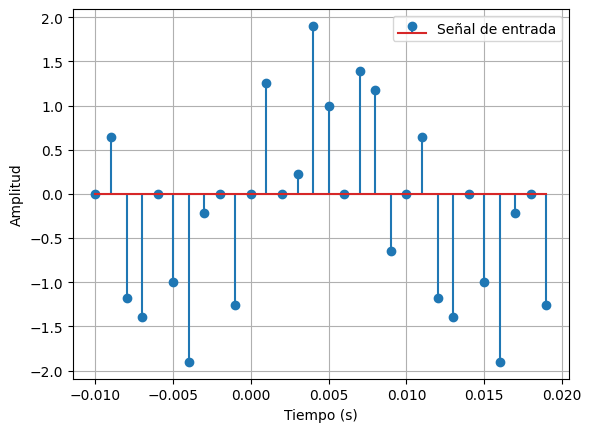

In [ ]:
hu = y_u
h = np.diff(hu).reshape(-1,1)
x = np.sin(100*np.pi*t) + np.sin(600*np.pi*t)
plt.figure()
plt.stem(t, x, label='Señal de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

Finalmente este fragmento de código se realiza la convolución de la señal de entrada x con la respuesta al impulso h del sistema, que previamente fue redimensionada a un arreglo 2D. La función np.convolve realiza la convolución entre las dos señales, y se especifica mode='same para que la salida tenga el mismo tamaño que la señal de entrada x. El resultado de la convolución se almacena en y_salida. Posteriormente, se visualiza la señal de salida utilizando la función plt.stem, que genera un gráfico de barras discretas. Se añaden etiquetas de los ejes, una leyenda, y una cuadrícula para una mejor presentación del gráfico. El título del gráfico es "Salida del sistema y[n]".


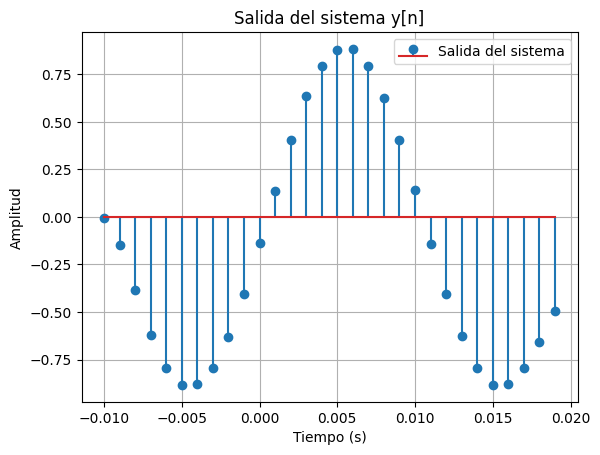

In [ ]:
# Realizar la convolución
# h fue redimensionado a un arreglo 2D, convolve espera arreglos 1D
# aplanar h a un arreglo 1D
y_salida = np.convolve(x, h.flatten(), mode='same')

# Visualización de la salida
plt.figure()
plt.stem(t, y_salida[:len(t)], label='Salida del sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()